# Homework 1 Report

+ **Answer 1**

```python
def compute_metric():
    true = ["C", "C", "C", "C", "C", "D", "D", "D",	"D", "D", "D", "D", "D", "M", "M", "M", "M", "M", "M", "M"]
    predicted = ["D", "C", "D", "D", "M", "D", "D", "C", "C", "M", "M", "D", "C", "C", "C", "M", "M", "D", "D",	"M"]

    # For the case of predicting cat
    conf_matrix={'C':{'TP':0, 'TN':0, 'FP':0, 'FN':0},'D':{'TP':0, 'TN':0, 'FP':0, 'FN':0},'M':{'TP':0, 'TN':0, 'FP':0, 'FN':0}}

    for t,p in zip(true, predicted):
        # For cat
        if t=='C' and p=='C': conf_matrix['C']['TP'] +=1
        if t!='C' and p!='C': conf_matrix['C']['TN'] +=1
        if t!='C' and p=='C': conf_matrix['C']['FP'] +=1
        if t=='C' and p!='C': conf_matrix['C']['FN'] +=1

        #For Dog
        if t=='D' and p=='D': conf_matrix['D']['TP'] +=1
        if t!='D' and p!='D': conf_matrix['D']['TN'] +=1
        if t!='D' and p=='D': conf_matrix['D']['FP'] +=1
        if t=='D' and p!='D': conf_matrix['D']['FN'] +=1

        #For Monkey
        if t=='M' and p=='M': conf_matrix['M']['TP'] +=1
        if t!='M' and p!='M': conf_matrix['M']['TN'] +=1
        if t!='M' and p=='M': conf_matrix['M']['FP'] +=1
        if t=='M' and p!='M': conf_matrix['M']['FN'] +=1

    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, \
        True Negative = {}, False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))

if __name__=="__main__":
    compute_metric()
```

## **Results**
```python
Confusion matrix for C : True Positive = 1, True Negative = 10, False Positive = 5, False Negative = 4
Accuracy for C = 0.55
Precision for C = 0.16666666666666666
Recall for C = 0.2
Confusion matrix for D : True Positive = 3, True Negative = 7, False Positive = 5, False Negative = 5
Accuracy for D = 0.5
Precision for D = 0.375
Recall for D = 0.375
Confusion matrix for M : True Positive = 3, True Negative = 10, False Positive = 3, False Negative = 4
Accuracy for M = 0.65
Precision for M = 0.5
Recall for M = 0.42857142857142855
```

## Problem -2: K-Nearest Neighbor Method (KNN) 

In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score#,confusion_matrix
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
print('starting...')

#old_stdout = sys.stdout
#log_file = open("summary.log","w")
#sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('./MNIST_Dataset_Loader/dataset/')

starting...

Loading MNIST Data...


In [3]:
print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)


Loading Training Data...


In [4]:
print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


Loading Testing Data...


In [5]:
#Features
X = train_img

#Labels
y = train_labels

In [6]:
print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


Preparing Classifier Training and Validation Data...


In [7]:
#######################PLACEHOLDER 1##################### 
#set hyperparameter
#n_neighbors=[5,10,13,15,20]
n_neighbors=[5, 10, 15, 20]

In [8]:
print("\n KNN Classifier")
print("\n Pickling the classifier for future Use.. " )

#######################PLACEHOLDER 2 START #####################
#write a function that can produce aconfusion matrix, per-class precidion rate and per-class recall rate.

# use the function to create a confusion matrix for validation data
def clf_per_n_nbr(nbrs, X_train, y_train, X_test, y_test):
    confidence_list=[]
    y_pred_list=[]
    accuracy_list=[]
    for n in nbrs:
        '''
        clf = KNeighborsClassifier(n_neighbors=n, algorithm='auto', n_jobs=10)
        clf.fit(X_train, y_train)
        
        
        
        with open(filename,'wb') as f:
            pickle.dump(clf, f)
        '''
        filename='MNIST_KNN'+'_'+str(n)+'.pickle'
        pickle_in = open(filename,'rb')
        clf = pickle.load(pickle_in)

        print('\n Calculating Accuracy of trained Classifier for nbrs = {}...'.format(n))
        confidence=round(clf.score(X_test,y_test),2)
        confidence_list.append(confidence)

        print('\n Making Predictions on Validation Data...for nbrs = {}'.format(n))
        y_pred=clf.predict(X_test)
        y_pred_list.append(y_pred)

        print('\n Calculating Accuracy of Predictions...for nbrs = {}'.format(n))
        accuracy=round(accuracy_score(y_test, y_pred),2)
        accuracy_list.append(accuracy)
        
    return confidence_list, y_pred_list, accuracy_list


 KNN Classifier

 Pickling the classifier for future Use.. 


In [9]:
confidence, y_pred, accuracy = clf_per_n_nbr(n_neighbors, X_train, y_train, X_test, y_test)


 Calculating Accuracy of trained Classifier for nbrs = 5...

 Making Predictions on Validation Data...for nbrs = 5

 Calculating Accuracy of Predictions...for nbrs = 5

 Calculating Accuracy of trained Classifier for nbrs = 10...

 Making Predictions on Validation Data...for nbrs = 10

 Calculating Accuracy of Predictions...for nbrs = 10

 Calculating Accuracy of trained Classifier for nbrs = 15...

 Making Predictions on Validation Data...for nbrs = 15

 Calculating Accuracy of Predictions...for nbrs = 15

 Calculating Accuracy of trained Classifier for nbrs = 20...

 Making Predictions on Validation Data...for nbrs = 20

 Calculating Accuracy of Predictions...for nbrs = 20


In [10]:
# Get the plots for each N/K (# of neighbors)

from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [38]:
from bokeh.models import ColumnarDataSource, FactorRange

print(accuracy)
print(confidence)

p = figure(x_range=['5','10','15','20'], plot_height=200, title="Confidence and Accuracy at different K")
p.vbar(x=['5','10','15','20'], top=confidence, width=0.3)
p.line(x=['5','10','15','20'], y=accuracy, line_width=2, color='green')

p.xgrid.grid_line_color=None
p.y_range.start=0.9
p.y_range.end=1.0
p.xaxis.axis_label = 'K'
p.yaxis.axis_label = 'Accuracy'
show(p)

[0.98, 0.97, 0.97, 0.97]
[0.98, 0.97, 0.97, 0.97]


In [27]:
print(y_test, y_pred[0])

[0 1 3 ... 3 6 0] [0 1 3 ... 3 6 0]


In [29]:
# Confusion Matrix per Class (10)
from collections import defaultdict
def compute_metrics(test, pred):
    # Create the dictionary for each class
    conf_matrix={val:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for val in range(10)}
    
    for t,p in zip(test, pred):
        for val in range(10):
            # For each class we can calculate this
            if t==val and p==val: conf_matrix[val]['TP'] +=1
            if t!=val and p!=val: conf_matrix[val]['TN'] +=1
            if t!=val and p==val: conf_matrix[val]['FP'] +=1
            if t==val and p!=val: conf_matrix[val]['FN'] +=1
    
    #to Plot
    acc_dict=[]
    prec_dict=[]
    rec_dict=[]
    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, True Negative = {}, \
        False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        conf_mat=np.array([[v['TP'], v['FP']],
                           [v['FN'], v['TN']]])
        #plt.matshow(conf_mat)
        #plt.title('Confusion Matrix for Validation Data')
        #plt.colorbar()
        #plt.ylabel('True label')
        #plt.xlabel('Predicted label')
        #plt.show()
        #print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        #print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        #print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))
        
        #Store to get the final plot
        acc_dict.append(round((v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN'])) ,3))
        prec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FP']))  ,3))
        rec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FN']))  ,3))
        
    return acc_dict, prec_dict, rec_dict

In [36]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

#Get the Metrics per class here
for n in range(4):
    print("\n")
    print("#######################################################################################")
    print("#######################################################################################")
    print("#######################################################################################")
    print("\n")
    print("For number of neighbors = {}".format(n_neighbors[n]))
    print('\n KNN Trained Classifier Confidence: ',confidence[n])
    print('\n Predicted Values: ',y_pred[n])
    print('\n Accuracy of Classifier on Validation Image Data: ',accuracy[n])
    acc_dict, prec_dict, rec_dict = compute_metrics(y_test, y_pred[n])
    
    classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    properties = ['Accuracy', 'Precision', 'Recall']
    
    data = {'classes': classes,
            'Accuracy': acc_dict,
            'Precision': prec_dict,
            'Recall': rec_dict
           }
    palette = ["#c9d9d3", "#718dbf", "#e84d60"]
    x = [ (c, p) for c in classes for p in properties ]
    counts = sum(zip(data['Accuracy'], data['Precision'], data['Recall']), ()) # like an hstack

    source = ColumnDataSource(data=dict(x=x, counts=counts))

    p = figure(x_range=FactorRange(*x), plot_height=350, title="Metrics per Class",
               toolbar_location=None, tools="")

    p.vbar(x='x', top='counts', width=0.9, source=source,line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=properties, start=1, end=2))

    p.y_range.start = 0.9
    p.x_range.range_padding = 0.1
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None

    show(p)
#######################PLACEHOLDER 2 ENDS ##################### 



#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 5

 KNN Trained Classifier Confidence:  0.98

 Predicted Values:  [0 1 3 ... 3 6 0]

 Accuracy of Classifier on Validation Image Data:  0.98
Confusion matrix for 0 : True Positive = 604, True Negative = 5387,         False Positive = 5, False Negative = 4
Confusion matrix for 1 : True Positive = 642, True Negative = 5337,         False Positive = 20, False Negative = 1
Confusion matrix for 2 : True Positive = 592, True Negative = 5391,         False Positive = 8, False Negative = 9
Confusion matrix for 3 : True Positive = 569, True Negative = 5407,         False Positive = 13, False Negative = 11
Confusion matrix for 4 : True Positive = 588, True Negative = 5383,         False Positive = 12, False



#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 10

 KNN Trained Classifier Confidence:  0.97

 Predicted Values:  [0 1 3 ... 3 6 0]

 Accuracy of Classifier on Validation Image Data:  0.97
Confusion matrix for 0 : True Positive = 604, True Negative = 5381,         False Positive = 11, False Negative = 4
Confusion matrix for 1 : True Positive = 642, True Negative = 5321,         False Positive = 36, False Negative = 1
Confusion matrix for 2 : True Positive = 581, True Negative = 5389,         False Positive = 10, False Negative = 20
Confusion matrix for 3 : True Positive = 564, True Negative = 5405,         False Positive = 15, False Negative = 16
Confusion matrix for 4 : True Positive = 583, True Negative = 5385,         False Positive = 10, F



#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 15

 KNN Trained Classifier Confidence:  0.97

 Predicted Values:  [0 1 3 ... 3 6 0]

 Accuracy of Classifier on Validation Image Data:  0.97
Confusion matrix for 0 : True Positive = 604, True Negative = 5383,         False Positive = 9, False Negative = 4
Confusion matrix for 1 : True Positive = 642, True Negative = 5316,         False Positive = 41, False Negative = 1
Confusion matrix for 2 : True Positive = 579, True Negative = 5389,         False Positive = 10, False Negative = 22
Confusion matrix for 3 : True Positive = 565, True Negative = 5402,         False Positive = 18, False Negative = 15
Confusion matrix for 4 : True Positive = 580, True Negative = 5384,         False Positive = 11, Fa



#######################################################################################
#######################################################################################
#######################################################################################


For number of neighbors = 20

 KNN Trained Classifier Confidence:  0.97

 Predicted Values:  [0 1 3 ... 3 6 0]

 Accuracy of Classifier on Validation Image Data:  0.97
Confusion matrix for 0 : True Positive = 603, True Negative = 5379,         False Positive = 13, False Negative = 5
Confusion matrix for 1 : True Positive = 642, True Negative = 5309,         False Positive = 48, False Negative = 1
Confusion matrix for 2 : True Positive = 573, True Negative = 5391,         False Positive = 8, False Negative = 28
Confusion matrix for 3 : True Positive = 560, True Negative = 5400,         False Positive = 20, False Negative = 20
Confusion matrix for 4 : True Positive = 578, True Negative = 5384,         False Positive = 11, Fa

In [39]:
# Now we need to choose which pickle file is best to use, Plot all of them
print(accuracy)

[0.98, 0.97, 0.97, 0.97]


### It seems that n=5 is giving an accuracy of 0.98 which is good enough

In [40]:
filename='MNIST_KNN_5.pickle'
pickle_in = open(filename,'rb')
clf = pickle.load(pickle_in)

In [41]:
print('\nMaking Predictions on Test Input Images...')
test_labels_pred=clf.predict(test_img)


Making Predictions on Test Input Images...


In [42]:
print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc=accuracy_score(test_labels, test_labels_pred)


Calculating Accuracy of Trained Classifier on Test Data... 


In [44]:
# Confusion Matrix per Class (10)
from collections import defaultdict
def compute_metrics_test(test, pred):
    # Create the dictionary for each class
    conf_matrix={val:{'TP':0, 'TN':0, 'FP':0, 'FN':0} for val in range(10)}
    
    for t,p in zip(test, pred):
        for val in range(10):
            # For each class we can calculate this
            if t==val and p==val: conf_matrix[val]['TP'] +=1
            if t!=val and p!=val: conf_matrix[val]['TN'] +=1
            if t!=val and p==val: conf_matrix[val]['FP'] +=1
            if t==val and p!=val: conf_matrix[val]['FN'] +=1
    
    #to Plot
    acc_dict=[]
    prec_dict=[]
    rec_dict=[]
    for k, v in conf_matrix.items():
        print("Confusion matrix for {}".format(k), ":", "True Positive = {}, True Negative = {}, \
        False Positive = {}, False Negative = {}".format(v['TP'], v['TN'], v['FP'], v['FN']))
        conf_mat=np.array([[v['TP'], v['FP']],
                           [v['FN'], v['TN']]])
        #plt.matshow(conf_mat)
        #plt.title('Confusion Matrix for Validation Data')
        #plt.colorbar()
        #plt.ylabel('True label')
        #plt.xlabel('Predicted label')
        #plt.show()
        #print("Accuracy for {} = {}".format(k, (v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN']))))
        #print("Precision for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FP']))))
        #print("Recall for {} = {}".format(k, (v['TP'])/(1.0*(v['TP']+v['FN']))))
        
        #Store to get the final plot
        acc_dict.append(round((v['TP']+v['TN'])/(1.0*(v['TP']+v['TN']+v['FP']+v['FN'])) ,3))
        prec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FP']))  ,3))
        rec_dict.append(round((v['TP'])/(1.0*(v['TP']+v['FN']))  ,3))
        
    return acc_dict, prec_dict, rec_dict

In [45]:
#######################PLACEHOLDER 3 START #####################
# call the same function as in PLACEHOLDER 2 to generate aconfusion matrix for testing data
#Get the Metrics per class here
print("#######################################################################################")
print("#######################################################################################")
print("#######################################################################################")


acc_dict, prec_dict, rec_dict = compute_metrics_test(test_labels, test_labels_pred)
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
properties = ['Accuracy', 'Precision', 'Recall']

data = {'classes': classes,
        'Accuracy': acc_dict,
        'Precision': prec_dict,
        'Recall': rec_dict
       }
palette = ["#c9d9d3", "#718dbf", "#e84d60"]
x = [ (c, p) for c in classes for p in properties ]
counts = sum(zip(data['Accuracy'], data['Precision'], data['Recall']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=350, title="Metrics per Class",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source,line_color="white",
   fill_color=factor_cmap('x', palette=palette, factors=properties, start=1, end=2))

p.y_range.start = 0.9
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)
#######################PLACEHOLDER 3 END #####################

#######################################################################################
#######################################################################################
#######################################################################################
Confusion matrix for 0 : True Positive = 974, True Negative = 8982,         False Positive = 38, False Negative = 6
Confusion matrix for 1 : True Positive = 1132, True Negative = 8812,         False Positive = 53, False Negative = 3
Confusion matrix for 2 : True Positive = 988, True Negative = 8950,         False Positive = 18, False Negative = 44
Confusion matrix for 3 : True Positive = 976, True Negative = 8952,         False Positive = 38, False Negative = 34
Confusion matrix for 4 : True Positive = 944, True Negative = 8992,         False Positive = 26, False Negative = 38
Confusion matrix for 5 : True Positive = 862, True Negative = 9079,         False Positive = 29, False Negative = 30
Confusion matrix for 6 : True Posit

Actual value = 4, Predicted value = 0


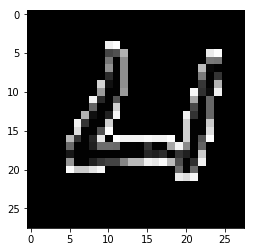



Actual value = 9, Predicted value = 4


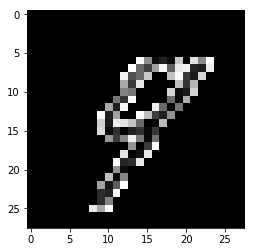



Actual value = 4, Predicted value = 9


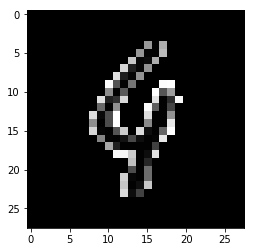



Actual value = 3, Predicted value = 1


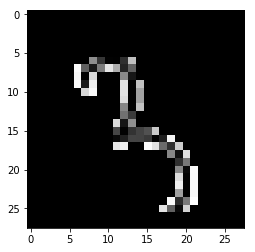



Actual value = 9, Predicted value = 8


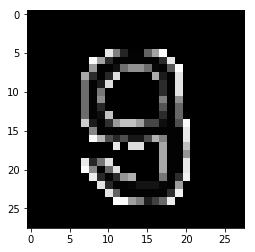

In [59]:
#######################PLACEHOLDER 4 START #####################
# randomly select and show 5 images that are misclassified
count=0
for idx,(t,p) in enumerate(zip(test_labels, test_labels_pred)):
        #if count>5:break
        for val in range(10):
            # For each class we can calculate this
            if t!=val and p==val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
            if t==val and p!=val:
                print("Actual value = {}, Predicted value = {}".format(t, p))
                toprint = (np.reshape(test_img[idx], (28, 28)) * 255).astype(np.uint8)
                plt.imshow(toprint, interpolation='nearest', cmap='gray')
                plt.show()
                count+=1
                print("\n")
                break
        if count>=5:break
                
#######################PLACEHOLDER 4 END #####################

## Challenges
+ Above I have shown five cases where there are misclassifications. 
+ It seems mostly there are shape variations and deformations that are causing the model to not predict correctly
+ There are some noise figures which are missclasified

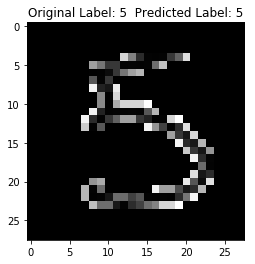

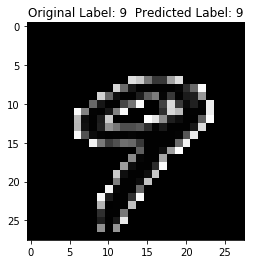

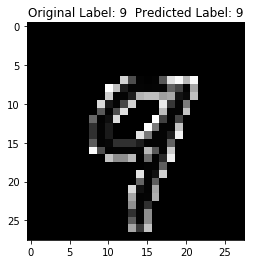

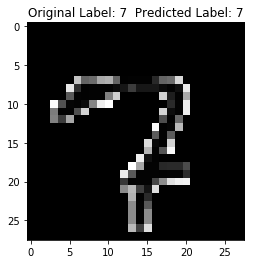

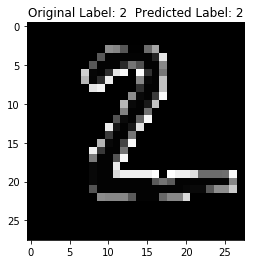

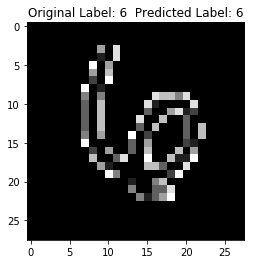

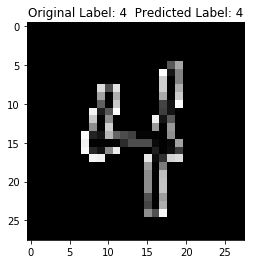

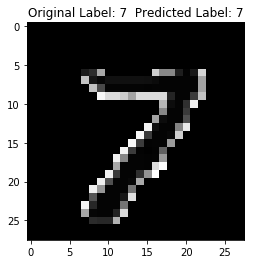

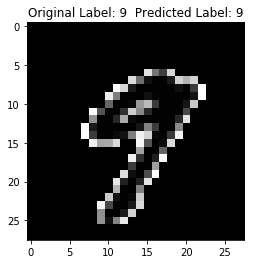

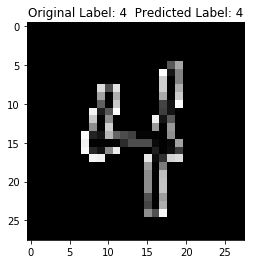

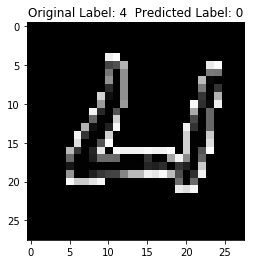

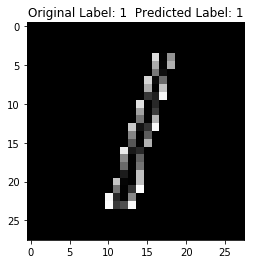

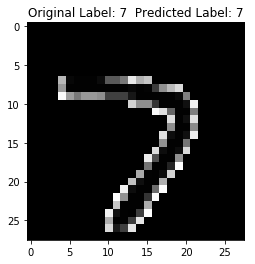

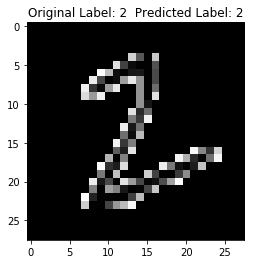

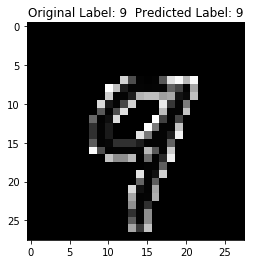

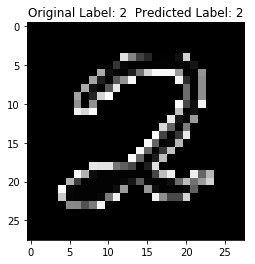

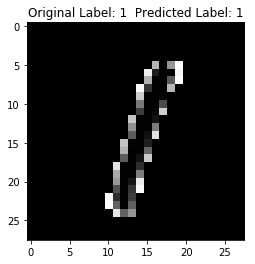

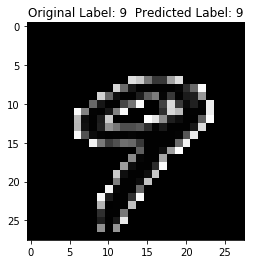

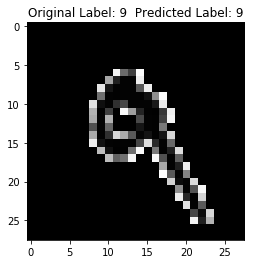

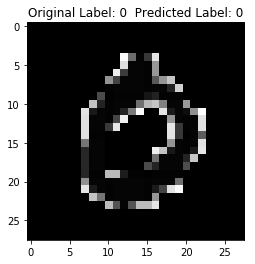

In [46]:
# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

#------------------------- EOC -----------------------------